In [1]:
import numpy as np
import pandas as pd

In [2]:
df_airlines = pd.read_csv('airlines.csv')
df_airports = pd.read_csv('airports.csv')
df_flights = pd.read_csv('flights.csv', low_memory=False)
df_flights_backup = df_flights.copy()

In [3]:
# backup to not rerun the read_csv again
df_flights = df_flights_backup.copy()

In [4]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


Let's clean our Datasets first by removing null values.

In [6]:
df_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

See the distinct values

In [7]:
for col in df_flights.columns:
    if(len(df_flights[col].unique()) <= 50):
        print(col, df_flights[col].unique())

YEAR [2015]
MONTH [ 1  2  3  4  5  6  7  8  9 10 11 12]
DAY [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
DAY_OF_WEEK [4 5 6 7 1 2 3]
AIRLINE ['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
DIVERTED [0 1]
CANCELLED [0 1]
CANCELLATION_REASON [nan 'A' 'B' 'C' 'D']


CANCELLATION_REASON has many null values as it's found only when the flight is cancelled.we can see the values count in it to see why the flight might be cancelled.

A : Airline/Carrier
B : Weather
C : National Air System
D : Security

In [8]:
df_flights['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

So the weather conditions is the most reason for the cancellation of flights.

The last 5 columns has many nulls and the same number of nulls let's see that.

In [9]:
df_flights.loc[df_flights['AIRLINE_DELAY'].notnull()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,...,607.0,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,...,632.0,43.0,0,0,NaN,43.0,0.0,0.0,0.0,0.0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,...,610.0,15.0,0,0,NaN,0.0,0.0,15.0,0.0,0.0
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,...,520.0,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,...,730.0,85.0,0,0,NaN,0.0,0.0,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015,12,31,4,B6,1029,N328JB,MCO,BQN,2342,...,345.0,20.0,0,0,NaN,0.0,0.0,17.0,3.0,0.0
5819051,2015,12,31,4,AS,28,N477AS,SEA,MSP,2355,...,535.0,28.0,0,0,NaN,12.0,0.0,16.0,0.0,0.0
5819057,2015,12,31,4,NK,371,N661NK,FLL,BQN,2358,...,346.0,28.0,0,0,NaN,15.0,0.0,13.0,0.0,0.0
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,...,1020.0,159.0,0,0,NaN,0.0,0.0,159.0,0.0,0.0


It's the delay in time made by AIR_SYSTEM and AIRLINE and WEATHER AND AIRCRAFT they have many null values,
But it's null as the flight might not have delayed so i'll put their null values with 0.0 instead of removing them.

In [10]:
df_flights[df_flights.columns[25:31]] = df_flights[df_flights.columns[25:31]].fillna(value=0.0)

We can't drop the rows which contains null in any column as for example the ELAPSED_TIME and AIR_TIME couldn't be recorded as the whole trip is canceled or diverted, so.

In [11]:
df_flights.loc[(df_flights['CANCELLED'] == True)]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,0.0,0.0,0.0,0.0,0.0
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,0.0,0.0,0.0,0.0,0.0
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0,1,B,0.0,0.0,0.0,0.0,0.0
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0,1,B,0.0,0.0,0.0,0.0,0.0
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0,1,A,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,1789,NaN,IAH,TPA,1955,...,NaN,NaN,0,1,A,0.0,0.0,0.0,0.0,0.0
5818157,2015,12,31,4,UA,222,NaN,SFO,LAX,2000,...,NaN,NaN,0,1,A,0.0,0.0,0.0,0.0,0.0
5818318,2015,12,31,4,AA,2245,N880AA,MIA,SAN,2019,...,NaN,NaN,0,1,A,0.0,0.0,0.0,0.0,0.0
5818777,2015,12,31,4,NK,416,N522NK,FLL,IAG,2155,...,NaN,NaN,0,1,A,0.0,0.0,0.0,0.0,0.0


In [12]:
df_flights.loc[(df_flights['DIVERTED'] == True)]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
724,2015,1,1,4,DL,716,N944DL,OMA,ATL,645,...,1451.0,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0
1455,2015,1,1,4,OO,5237,N712SK,MKE,IAH,745,...,1505.0,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2218,2015,1,1,4,WN,1966,N685SW,ATL,JAX,845,...,1219.0,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2526,2015,1,1,4,EV,4555,N12552,IAH,HRL,902,...,1319.0,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2866,2015,1,1,4,WN,1081,N214WN,MDW,OKC,930,...,1343.0,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813860,2015,12,31,4,UA,1291,N596UA,LIH,LAX,1405,...,NaN,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0
5815052,2015,12,31,4,EV,2785,N684JW,DFW,BRO,1530,...,NaN,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0
5816657,2015,12,31,4,UA,291,N76505,IAD,SMF,1735,...,2216.0,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0
5817342,2015,12,31,4,MQ,3060,N648MQ,DFW,FAR,1830,...,2250.0,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0


We can drop the rows which contains null and shouldn't have true in canceled or diverted.

In [13]:
df_flights[(df_flights['CANCELLED'] == 1) | (df_flights['DIVERTED'] == 1)]=df_flights[(df_flights['CANCELLED'] == 1) | (df_flights['DIVERTED'] == 1)].fillna(0)

Flights contain YEAR which has 1 distinct value 2015. drop it

In [14]:
df_flights.drop('YEAR', axis=1,inplace=True)

In [15]:
df_flights.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [16]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [17]:
df_airports['COUNTRY'].unique()

array(['USA'], dtype=object)

Airports has useless column (COUNTRY) which contain 1 distinct value "USA".

In [18]:
df_airports.drop('COUNTRY', axis=1, inplace=True)

Also Yea

drop the airports that i don't know it's geolocation. 3 rows deleted.

In [19]:
df_airports.dropna(inplace=True)

Now remove the outliers.

Integrating the flights with airlines where df_flights.AIRLINE -> df_airlines.IATA_CODE, one airline to many flights.

After that we don't need the IATA_CODE in our DF anymore as we have the airport name.

In [20]:
df_integrated = pd.merge(df_flights, df_airlines, left_on="AIRLINE", right_on="IATA_CODE")
df_integrated.drop(['IATA_CODE','AIRLINE_x'], axis=1, inplace=True)
df_integrated.rename(columns={"AIRLINE_y": "AIRLINE"}, inplace =True)

In [21]:
display(df_integrated)

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,1,1,4,98,N407AS,ANC,SEA,5,2354.0,-11.0,...,-22.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
1,1,1,4,135,N527AS,SEA,ANC,25,24.0,-1.0,...,-21.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
2,1,1,4,108,N309AS,ANC,SEA,45,41.0,-4.0,...,-14.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
3,1,1,4,122,N413AS,ANC,PDX,50,46.0,-4.0,...,-18.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
4,1,1,4,130,N457AS,FAI,SEA,115,107.0,-8.0,...,-3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,769,N622VA,LGA,DAL,1855,1847.0,-8.0,...,-6.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America
5819075,12,31,4,357,N284VA,BOS,SFO,1859,1849.0,-10.0,...,-46.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America
5819076,12,31,4,1916,N853VA,SFO,LAS,1940,1933.0,-7.0,...,-18.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America
5819077,12,31,4,490,N840VA,LAX,LAS,1950,1948.0,-2.0,...,-11.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America


Integrate result with airports.
df_flights.ORIGIN_AIRPORT, df_flights.DESTINATION_AIRPORT -> df_airports.IATA_CODE, one airport to many flights.

In [22]:
# integrate with the source airport first.
df_integrated_origin = pd.merge(df_integrated, df_airports, left_on="ORIGIN_AIRPORT", right_on="IATA_CODE")
df_integrated_origin.drop(['ORIGIN_AIRPORT','IATA_CODE'], axis=1, inplace=True)

In [23]:
display(df_integrated_origin)

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE
0,1,1,4,98,N407AS,SEA,5,2354.0,-11.0,21.0,...,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
1,1,1,4,108,N309AS,SEA,45,41.0,-4.0,17.0,...,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
2,1,1,4,122,N413AS,PDX,50,46.0,-4.0,11.0,...,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
3,1,1,4,136,N431AS,SEA,135,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
4,1,1,4,134,N464AS,SEA,155,140.0,-15.0,17.0,...,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328304,12,31,4,1471,N200WN,FLL,1245,1245.0,0.0,7.0,...,0.0,0.0,0.0,0.0,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,40.79524,-73.10021
5328305,12,31,4,5086,N903WN,BWI,1425,1458.0,33.0,5.0,...,0.0,7.0,18.0,0.0,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,40.79524,-73.10021
5328306,12,31,4,1178,N551WN,PBI,1510,1541.0,31.0,9.0,...,0.0,10.0,11.0,0.0,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,40.79524,-73.10021
5328307,12,31,4,1140,N427WN,MCO,1530,1537.0,7.0,10.0,...,0.0,0.0,0.0,0.0,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,40.79524,-73.10021


Rename the inserted columns of the airport in integrated dataframe with origin_{column_name}

In [24]:
df_integrated_origin.rename(columns={"AIRPORT": "ORIGIN_AIRPORT", "CITY": "ORIGIN_CITY", "STATE": "ORIGIN_STATE", "LATITUDE": "ORIGIN_LATITUDE", "LONGITUDE": "ORIGIN_LONGITUDE"}, inplace=True)

Integrate with the destination airport.

In [25]:
df_full_integration = pd.merge(df_integrated_origin, df_airports, left_on="DESTINATION_AIRPORT", right_on="IATA_CODE")
df_full_integration.drop(['DESTINATION_AIRPORT','IATA_CODE'], axis=1, inplace=True)

In [26]:
df_full_integration.rename(columns={"AIRPORT": "DEST_AIRPORT", "CITY": "DEST_CITY", "STATE": "DEST_STATE", "LATITUDE": "DEST_LATITUDE", "LONGITUDE": "DEST_LONGITUDE"}, inplace=True)
display(df_full_integration)

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE
0,1,1,4,98,N407AS,5,2354.0,-11.0,21.0,15.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
1,1,1,4,108,N309AS,45,41.0,-4.0,17.0,58.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
2,1,1,4,136,N431AS,135,0.0,0.0,0.0,0.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
3,1,1,4,134,N464AS,155,140.0,-15.0,17.0,157.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
4,1,1,4,114,N303AS,220,209.0,-11.0,15.0,224.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323694,12,29,2,2734,N884AS,2046,2037.0,-9.0,6.0,2043.0,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
5323695,12,30,3,2730,N880AS,1435,1616.0,101.0,4.0,1620.0,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
5323696,12,30,3,2734,N907EV,2046,2056.0,10.0,12.0,2108.0,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
5323697,12,31,4,2730,N907EV,1435,1421.0,-14.0,9.0,1430.0,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706


In [27]:
df_full_integration.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE', 'ORIGIN_AIRPORT',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE', 'DEST_LATITUDE',
       'DEST_LONGITUDE'],
      dtype='object')

Feature Engineering

We will add new Feature ( average speed of the plane = DISTANCE / AIR_TIME).

In [28]:
dfi = df_full_integration

In [29]:
dfi.loc[dfi['AIR_TIME']!=0, 'AVG_SPEED'] = dfi['DISTANCE'] / dfi['AIR_TIME']
dfi.loc[dfi['AIR_TIME']==0, 'AVG_SPEED'] = 0

In [35]:
dfi.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE', 'ORIGIN_AIRPORT',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE', 'DEST_LATITUDE',
       'DEST_LONGITUDE', 'AVG_SPEED'],
      dtype='object')

Change cancellation_reason from categorical to numerical to be able to use it in analysis or put the data in ML model.
A:1, B:2, C:3, D:4, null: 0

In [31]:
dfi.loc[dfi['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
dfi.loc[dfi['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
dfi.loc[dfi['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
dfi.loc[dfi['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4
dfi['CANCELLATION_REASON'] = dfi['CANCELLATION_REASON'].fillna(0)

What is the delay in each airline?

<AxesSubplot: xlabel='ARRIVAL_DELAY', ylabel='AIRLINE'>

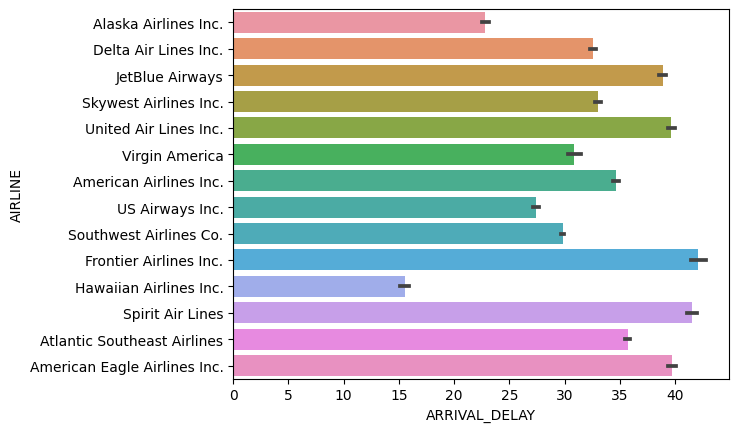

In [38]:
import seaborn as sns
sns.barplot(data=dfi.loc[dfi['ARRIVAL_DELAY'] > 0], x="ARRIVAL_DELAY", y="AIRLINE")

Let's categorize the delays in each airline to 3:Early(<0) 0:low(0-10) 1:medium(10-30) 2:high(30+) delays

In [45]:
dfi.loc[ (dfi['ARRIVAL_DELAY']>=0) & (dfi['ARRIVAL_DELAY']<=10), 'DELAY_CATEGORY'] = 0
dfi.loc[(dfi['ARRIVAL_DELAY']>10) & (dfi['ARRIVAL_DELAY']<=30), 'DELAY_CATEGORY'] = 1
dfi.loc[(dfi['ARRIVAL_DELAY']>30), 'DELAY_CATEGORY'] = 2
dfi.loc[(dfi['ARRIVAL_DELAY']<0), 'DELAY_CATEGORY'] = 3

Number of flights in each airline

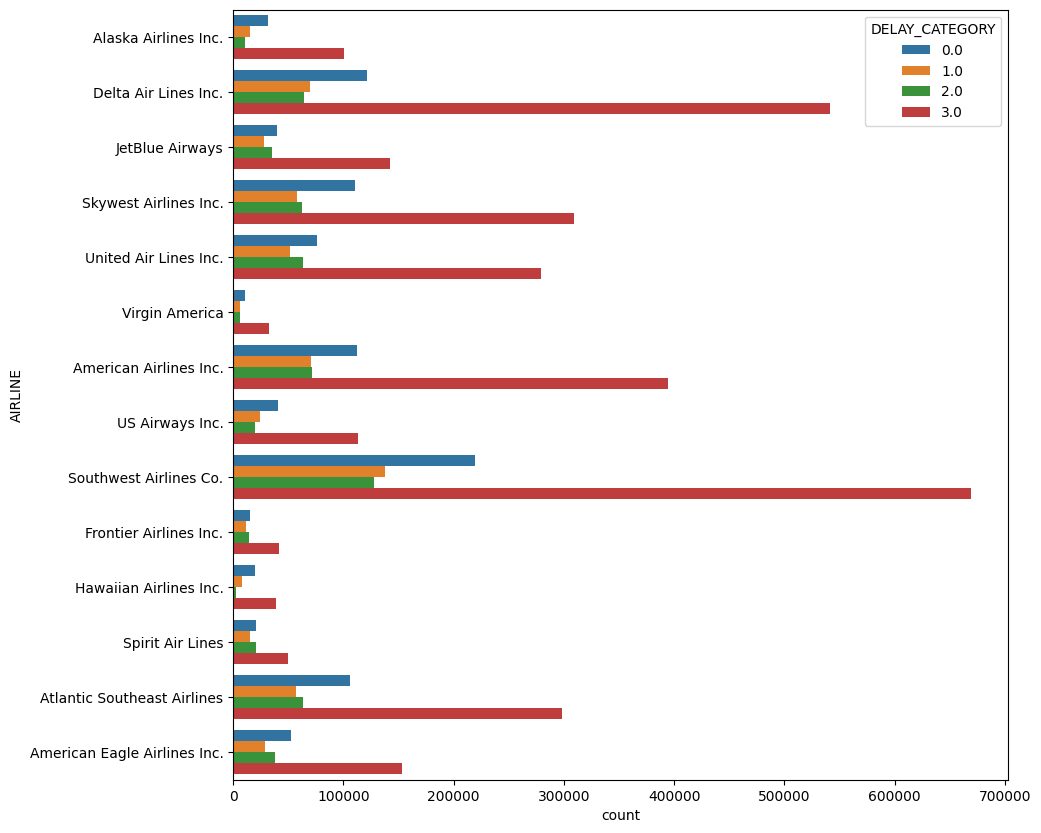

In [47]:
fig = plt.figure(1, figsize=(10,10))
ax=sns.countplot(y='AIRLINE', hue='DELAY_CATEGORY', data=dfi)

Insights about the arrival delays.

Delta, American and southwest are the most 3 that come earlier than scheduled.

Southwest, American and Atlantic are the most 3 that have small delays ( delays<=10 mins )

Southwest, united and American are the most 3 that have long delays (delays > 30 mins)

Pearson correlation between numerical attributes to see if some depends on the other/ Feature extraction / dimensionality reduction.

In [33]:
# first select only the numerical columns
numerical = dfi.select_dtypes(include=np.number)

C:\Users\saryn\AppData\Local\Temp\ipykernel_22832\3102856770.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfi.corr()


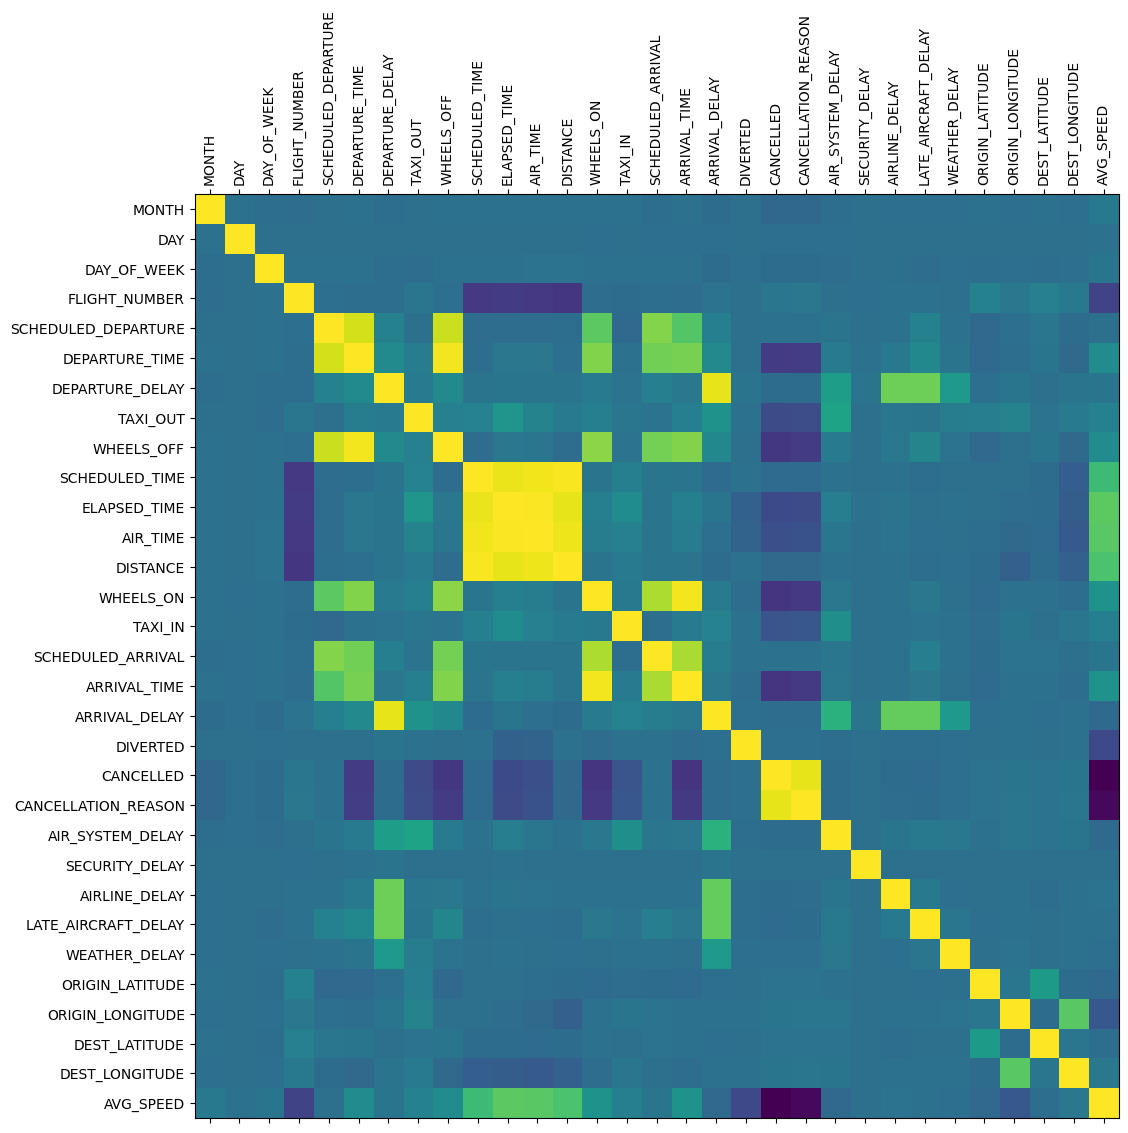

In [34]:
# then visualize the correlation between the numerical attributes.
import matplotlib.pyplot as plt
corr = dfi.corr()
fix, ax = plt.subplots(figsize=(12,12))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Normalize some columns with log transformation, to make it like the normal distribution.